# Week 3 SA

Hey Everyone!! 
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [22]:
import pandas as pd
import numpy as np

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [23]:
df = pd.read_csv('emails.csv')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


## Describe the data and generate some basic insights unsing methods like .info

In [24]:
df.head()

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
None
               the           to          ect          and          for  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      6.640565     6.188128     5.143852     3.075599     3.124710   
std      11.745009     9.534576    14.101142     6.045970     4.680522   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     1.000000   
50%       3.000000     3.000000     1.000000     1.000000     2.000000   
75%       8.000000     7.000000     4.000000     3.000000     4.000000   
max     210.000000   132.000000   344.000000    89.000000    47.000000   

                of            a          you          hou           in  ...  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  .

## Looking at the data

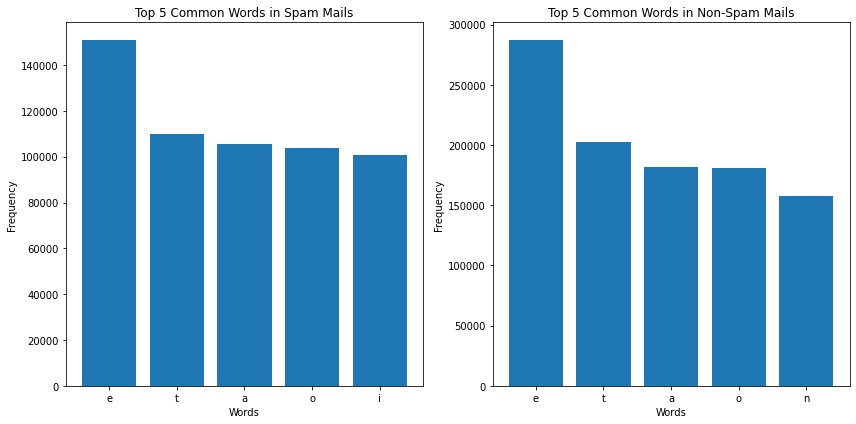

In [25]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
import matplotlib.pyplot as plt

spam_rows = df[df['Prediction'] == 1]
non_spam_rows = df[df['Prediction'] == 0]

top_5_spam_words = spam_rows.drop(columns=['Email No.', 'Prediction']).sum().nlargest(5)

top_5_non_spam_words = non_spam_rows.drop(columns=['Email No.', 'Prediction']).sum().nlargest(5)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(top_5_spam_words.index, top_5_spam_words.values)
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Top 5 Common Words in Spam Mails')

axes[1].bar(top_5_non_spam_words.index, top_5_non_spam_words.values)
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Top 5 Common Words in Non-Spam Mails')

plt.tight_layout()
plt.show()

## Figuring out some comparatively more important features

In [8]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset? 
# Try taking only top 1.5K that will comprise of some of the most "deciding factors" 
df.set_index("Email No.", inplace = True)
for col in df.columns:
    if len(col) <= 6:
        del df[col]

df.drop("Email 1410")

,forwarded,company,attached,information,message,contract,questions,volumes,following,production,...,imbalances,reallocated,australia,remains,enhancements,connevey,infrastructure,military,allowing,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,3,0,1,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
Email 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 5,2,0,0,0,0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Email 5168,0,0,1,0,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 5169,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 5170,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Train - Test Split

In [11]:
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Create trianing and testing data
x = df.iloc[:, :1198]
x = x.values

y = df.iloc[:, -1]
y = y.values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print('')
    print(confusion_matrix(y_test, y_pred), '\n')
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    cm.plot()

## Making Predictions using Multinomial NB Classifier

In [12]:
# Feed the train data into multinomial naive bias classifier
model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)


MultinomialNB() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. MultinomialNB MultinomialNB()

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       719
           1       0.89      0.99      0.94       316

    accuracy                           0.96      1035
   macro avg       0.94      0.97      0.95      1035
weighted avg       0.96      0.96      0.96      1035



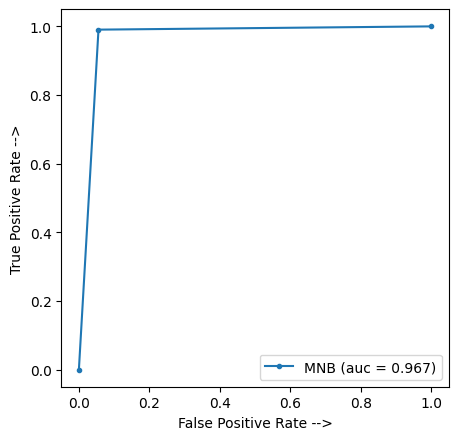

In [13]:
# Check the model's accuracy of test data and plot the ROC-AUC curve
y_pred_mnb = model_mnb.predict(x_test)


print(classification_report(y_test, y_pred_mnb))
from sklearn.metrics import roc_curve, auc

mnb_fpr, mnb_tpr, threshold = roc_curve(y_test, y_pred_mnb)
auc_mnb = auc(mnb_fpr, mnb_tpr)



plt.figure(figsize=(5, 5), dpi=100)
plt.plot(mnb_fpr, mnb_tpr, marker='.', label='MNB (auc = %0.3f)' % auc_mnb)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

## Plot the confusion Matrix

Precision :  0.886685552407932
Recall :  0.990506329113924
Accuracy :  0.9584541062801932
F1 Score :  0.9357249626307922

[[679  40]
 [  3 313]] 



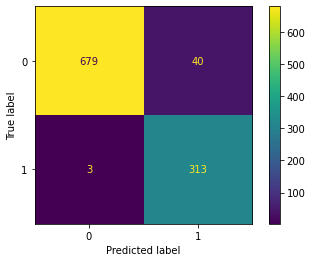

In [14]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'
perform(y_pred_mnb)

## Trying out with SVMs

In [15]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. SVC SVC()

## Comparing the models

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       719
           1       1.00      0.93      0.97       316

    accuracy                           0.98      1035
   macro avg       0.99      0.97      0.98      1035
weighted avg       0.98      0.98      0.98      1035



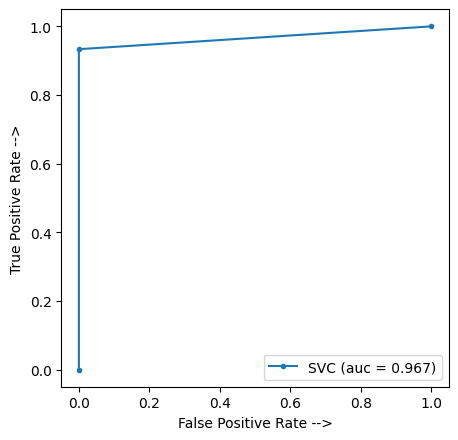

In [19]:
# Which model performed better?
# Can you suggest some reason for better performance of one model over the other?
y_pred_svc = model_svc.predict(x_test)

print(classification_report(y_test, y_pred_svc))

from sklearn.metrics import roc_curve, auc

svc_fpr, svc_tpr, threshold = roc_curve(y_test, y_pred_svc)
auc_svc = auc(svc_fpr, svc_tpr)



plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVC (auc = %0.3f)' % auc_svc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# SVM outperforms the Multinomial NB Classifier in this instance, as seen by the "precision" and "accuracy" scores. The primary cause of this is

# The primary difference between the models we're developing in terms of 'features' is that Naive Bayes sees them as independent, but SVM, as long as we're using a non-linear kernel (Gaussian, rbf, poly, etc.), looks at the interactions between them to some extent. An SVM will be better at capturing interactions, and given our challenge, we most likely do, making it better at the classification task we are after.

Precision :  1.0
Recall :  0.9335443037974683
Accuracy :  0.9797101449275363
F1 Score :  0.9656301145662847

[[719   0]
 [ 21 295]] 



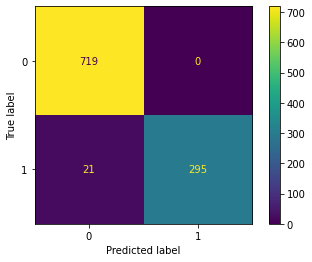

In [20]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'

perform(y_pred_svc)

## Bonus Question

In [ ]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example 
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

In [21]:
import pandas as pd

# Input string
s = "I am a Python developer and currently working on a project to classify mails. I like Python"

# Split the string into words
words = s.split()

# Count the frequency of each word
word_freq = {}
for word in words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Create a DataFrame from the word frequencies
df = pd.DataFrame({"Word": list(word_freq.keys()), "Frequency": list(word_freq.values())})

# Print the DataFrame
print(df)

         Word  Frequency
0           I          2
1          am          1
2           a          2
3      Python          2
4   developer          1
5         and          1
6   currently          1
7     working          1
8          on          1
9     project          1
10         to          1
11   classify          1
12     mails.          1
13       like          1
